In [1]:
import pandas as pd
import os
import csv
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# FUNCTIONS FOR CORRELATION ANALYSIS

In [2]:
def corr_analysis(file_path):
    # Load the data into a dataframe
    # Replace 'your_data.csv' with your actual data file name
    df = pd.read_csv(file_path)

    # Perform correlation analysis
    corr_matrix = df.corr()  # Compute correlation matrix
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Create heatmap

    # Create scatter plots for each dependent variable against the independent variable
    dependent_vars = ['length', 'width', 'diameter', 'area', 'perimeter', 'rectangularity',
                      'circularity', 'ellipticity', 'aspect ratio', 'form factor', 'narrow factor',
                      'perimeter ratio of diameter', 'perimeter Ratio of Physiological Length and Physiological Width',
                      'Texture']

    independent_var = 'Species'
    for var in dependent_vars:
        sns.lineplot(x=independent_var, y=var, data=df)
        plt.xlabel(independent_var)
        plt.ylabel(var)
        plt.title(f'Scatter plot of {var} vs. {independent_var}')
        plt.show()


def find_variable_impact(file_path):

    # Load the data into a dataframe
    # Replace 'your_data.csv' with your actual data file name
    df = pd.read_csv(file_path)

    # Prepare the data for regression analysis
    X = df[['length', 'width', 'diameter', 'area', 'perimeter', 'rectangularity',
                      'circularity', 'ellipticity', 'aspect ratio', 'form factor', 'narrow factor',
                      'perimeter ratio of diameter', 'perimeter Ratio of Physiological Length and Physiological Width',
                      'Texture']]  # Independent variables
    y = df['Species']  # Dependent variable

    # Add a constant term to the independent variables
    X = sm.add_constant(X)

    # Fit the multiple linear regression model
    model = sm.OLS(y, X).fit()

    # Get the coefficients (impact) of each dependent variable
    coefficients = model.params[1:]

    # Sort the coefficients by absolute values to identify the variables with the most impact
    sorted_coefficients = coefficients.abs().sort_values(ascending=False)

    # Print the sorted coefficients
    print("Dependent variables sorted by impact on the independent variable:")
    print(sorted_coefficients)


def corr(file_path):
    corr_analysis(file_path)
    find_variable_impact(file_path)

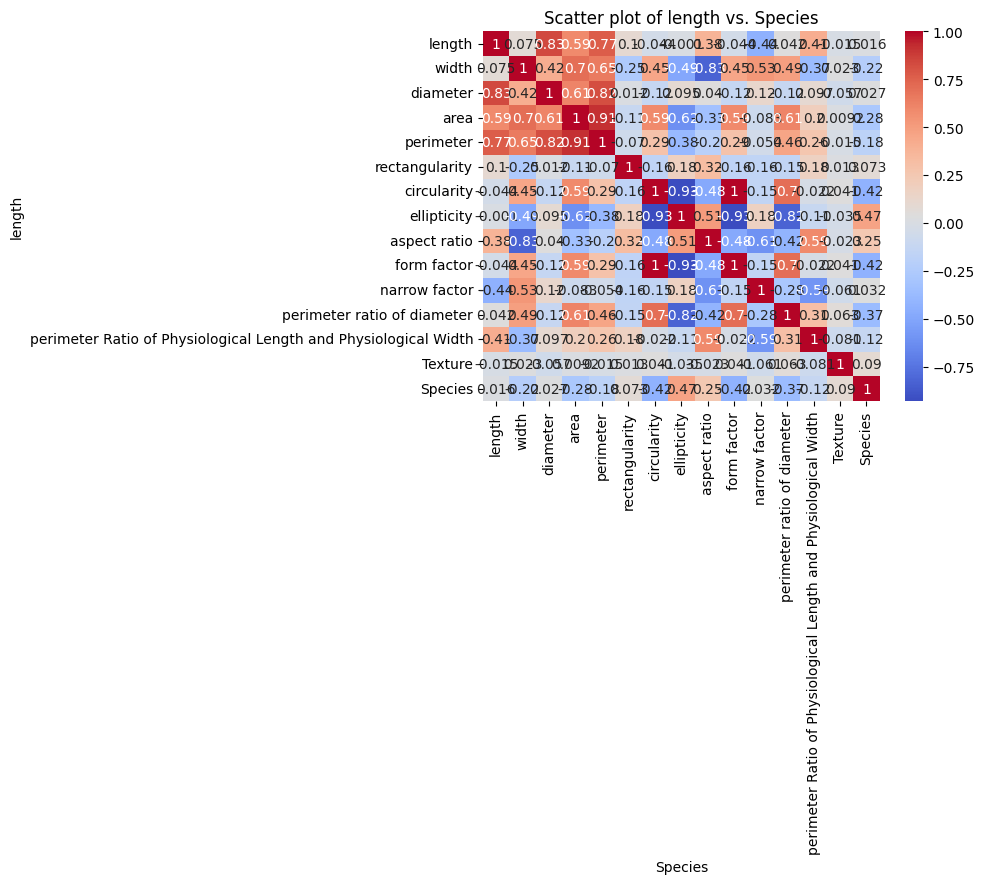

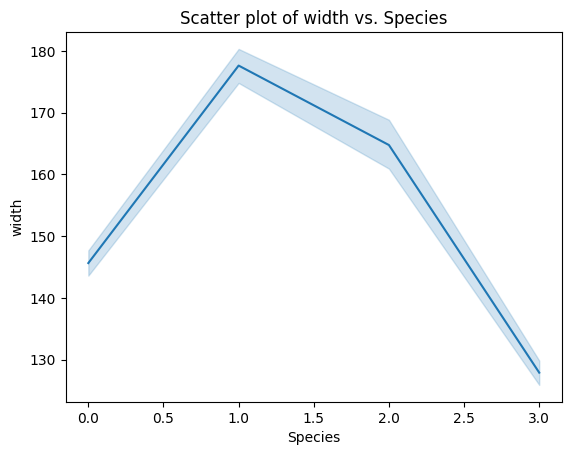

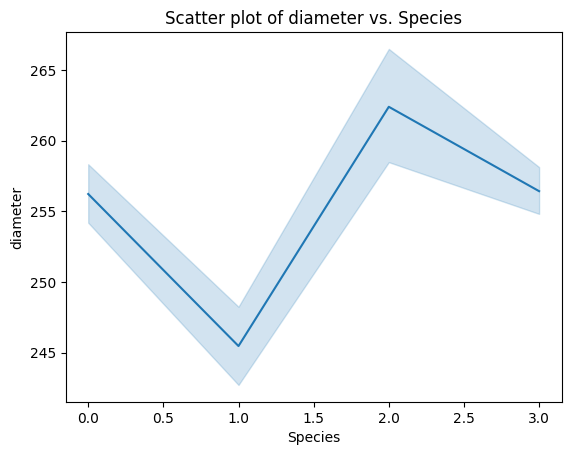

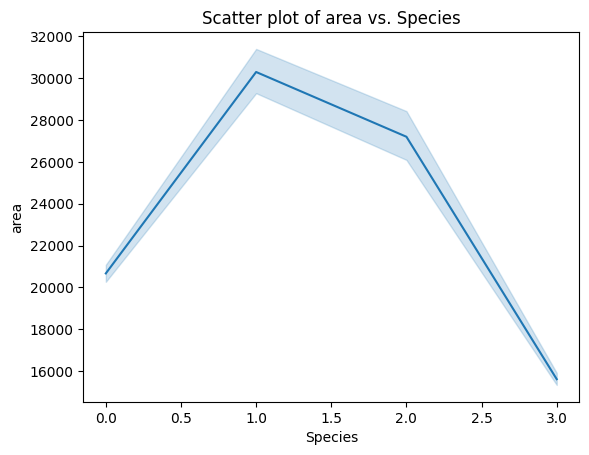

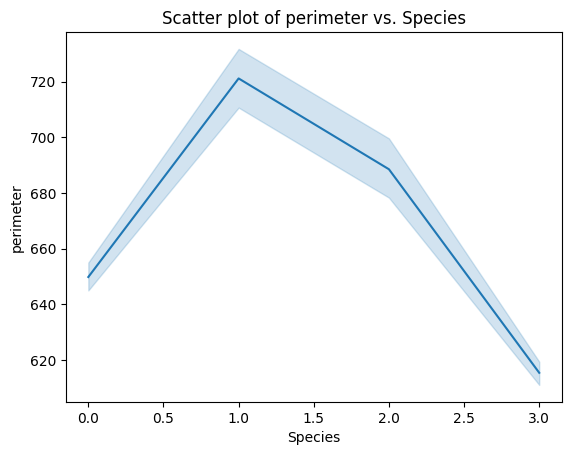

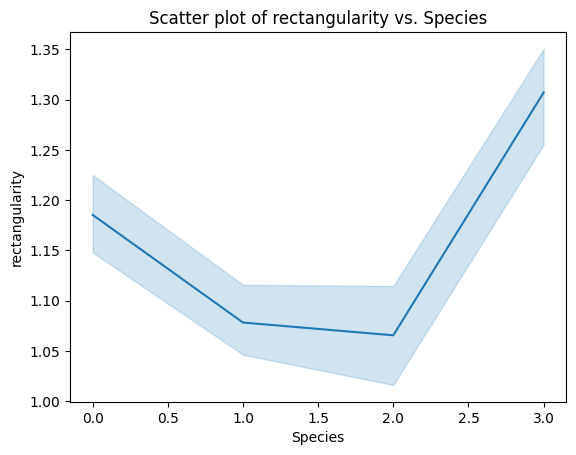

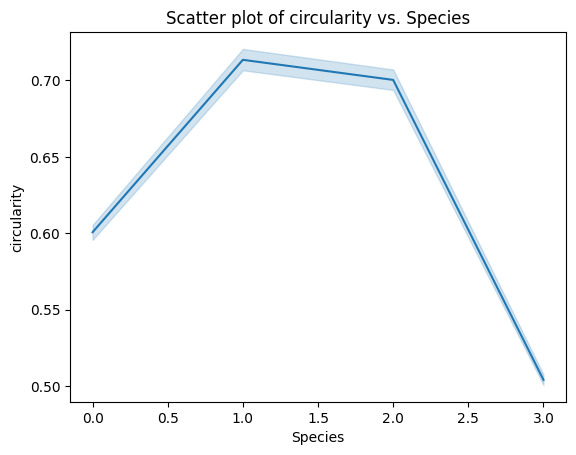

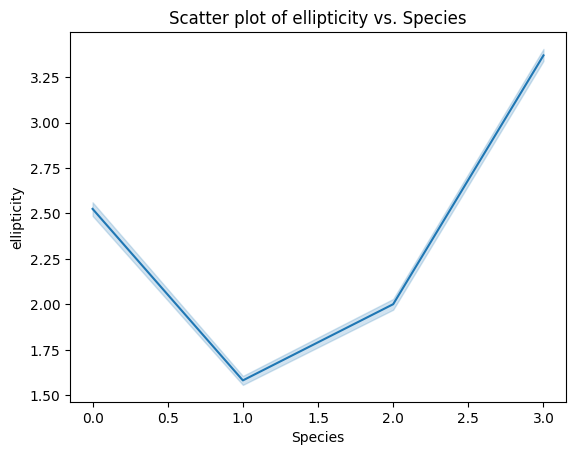

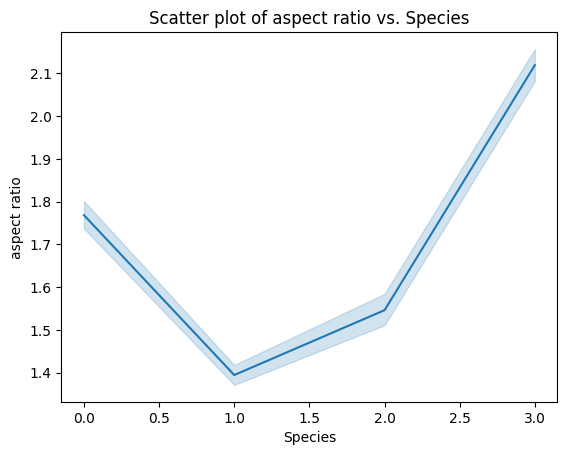

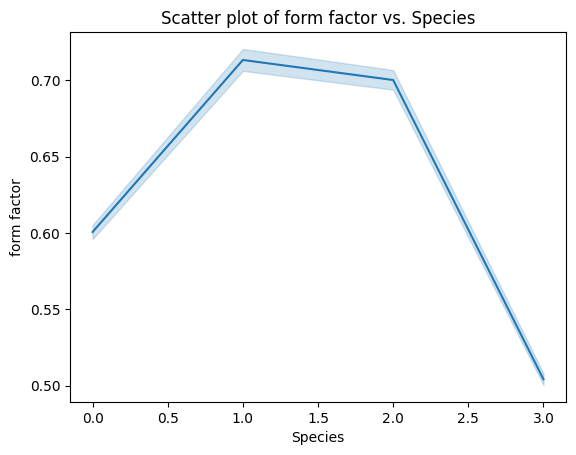

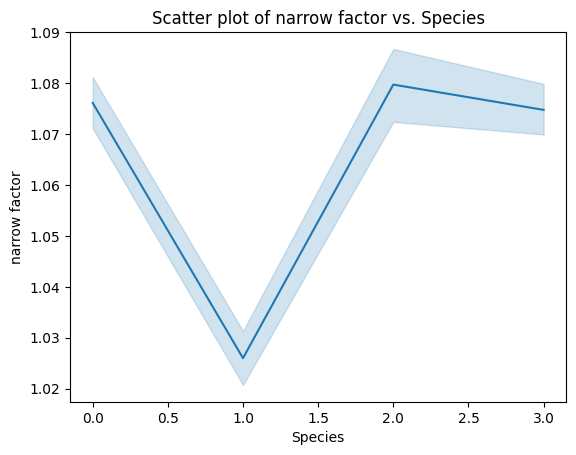

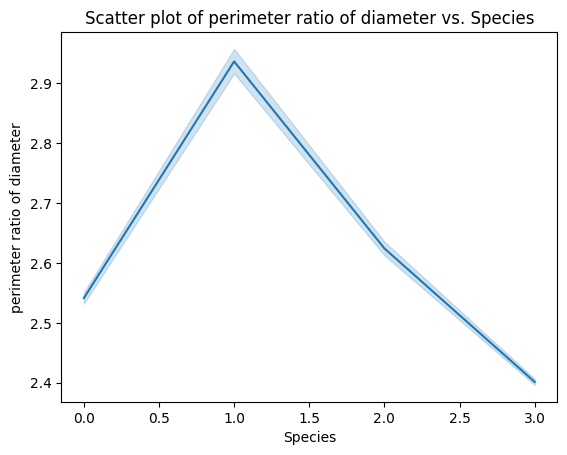

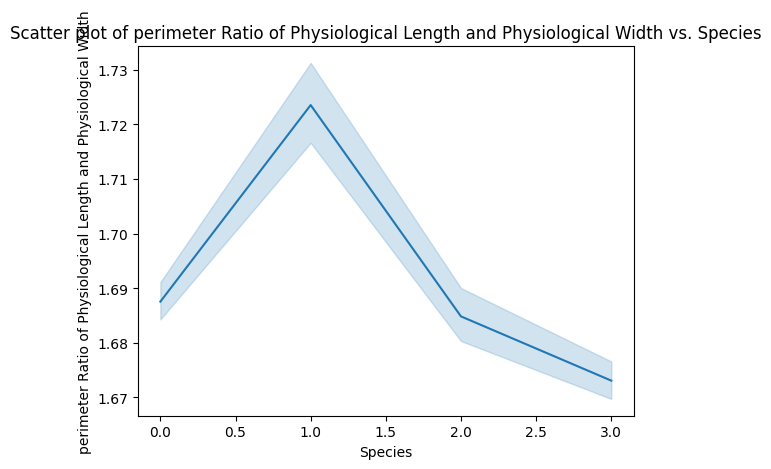

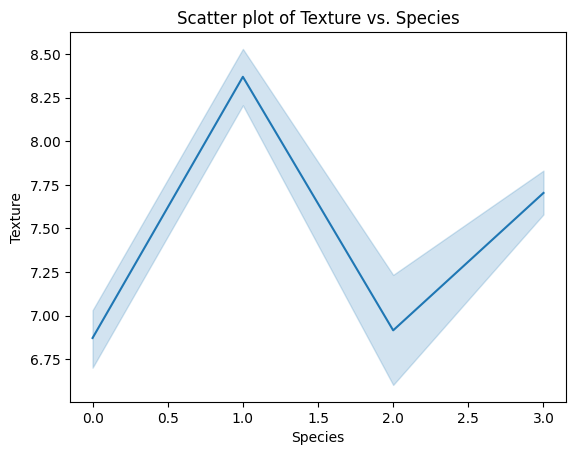

MissingDataError: exog contains inf or nans

In [3]:
image = None
texture = None
file_path = '../csv/features_data-Sheet1.csv'

corr(file_path)